In [1]:
import sys
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
import keras
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D,\
Flatten, ZeroPadding2D, AveragePooling2D, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Input
from resnet_utils import conv_block, identity_block

if __name__ == "__main__":
    sys.path.append("../../../") 
from notebooks_src.configs import configs

Using TensorFlow backend.


importing Jupyter notebook from resnet_utils.ipynb
importing Jupyter notebook from ../../../notebooks_src/models/configs.ipynb
importing Jupyter notebook from ../../../notebooks_src/config_util.ipynb
importing Jupyter notebook from ../../../notebooks_src/load_data/configs.ipynb


In [2]:
# def ResNet50(include_top=True, weights='imagenet',
#  input_tensor=None, input_shape=None,
#  pooling=None,
#  classes=1000):
"""Instantiates the ResNet50 architecture.
Optionally loads weights pre-trained
on ImageNet
# Arguments
    weights: one of `None` (random initialization)
        or "imagenet" (pre-training on ImageNet).
    input_shape: optional shape tuple, only to be specified
        if `include_top` is False (otherwise the input shape
        has to be `(224, 224, 3)` (with `channels_last` data format)
        or `(3, 224, 224)` (with `channels_first` data format).
        It should have exactly 3 inputs channels,
        and width and height should be no smaller than 197.
        E.g. `(200, 200, 3)` would be one valid value.

# Returns
    A Keras model instance.
""" 


WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


def ResNet50(inp_shape):
    layers = {}
    img_input = Input(shape=inp_shape)
    bn_axis = 3

    layers["input"] = img_input

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='valid',name='conv1')(img_input)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    layers["conv1"] = x

    x = MaxPooling2D((3, 3), strides=(2, 2),padding="valid")(x)
    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')
    layers["conv2_x"] = x


    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a', strides=(2,2))
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')
    layers["conv3_x"] = x

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a',strides=(2,2))
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')
    layers["conv4_x"] = x

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a', strides=(2,2))
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
    layers["conv5_x"] = x
    layers["last"]

    return layers

def get_base_layers(inp_shape=None):
    if inp_shape is None:
        inp_shape = configs["tensor_input_shape"]
    #returns a dictionary mapping the local receptive field size to a layer for all relevant layers
    layers_dict = ResNet50(inp_shape)
    # add one b/c for n layers we want 0th layer up to and including nth layer (1st layer is 2^1 lrf, nth is 2^n)
    return layers_dict

In [6]:
get_base_layers()

{'conv1': <tf.Tensor 'activation_148/Relu:0' shape=(?, 381, 573, 64) dtype=float32>,
 'conv2_x': <tf.Tensor 'activation_157/Relu:0' shape=(?, 190, 286, 256) dtype=float32>,
 'conv3_x': <tf.Tensor 'activation_169/Relu:0' shape=(?, 95, 143, 512) dtype=float32>,
 'conv4_x': <tf.Tensor 'activation_187/Relu:0' shape=(?, 48, 72, 1024) dtype=float32>,
 'conv5_x': <tf.Tensor 'activation_196/Relu:0' shape=(?, 24, 36, 2048) dtype=float32>,
 'input': <tf.Tensor 'input_4:0' shape=(?, 768, 1152, 16) dtype=float32>}

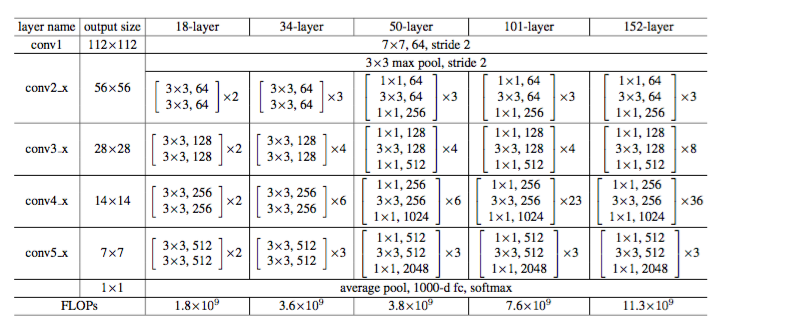

In [2]:
from IPython.display import Image
Image(filename='./../resnet_table.png') 

In [5]:
Conv2D?